In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_mean_std_shaded
import scienceplots
plt.style.use(['science','no-latex'])

In [10]:
# read csv
mode = 'ED'
data = np.genfromtxt(f'./results/{mode}.csv', delimiter=',', skip_header=1, skip_footer=1)

In [11]:
data[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [12]:
data.shape

(50, 22)

In [13]:
z = np.mean(data[:][:, 2::2], axis=-1)
z_error = np.std(data[:][:, 2::2], axis=-1) 
# z_error = np.sqrt(np.sum(data[:][:, 3::2]**2, axis=-1) / len(data[:][:, 3::2]))
n = data[:][:, 0]
latent = data[:][:, 1]

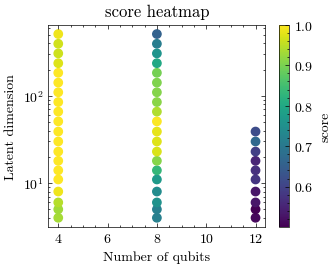

In [14]:
# heatmap
fig, ax = plt.subplots()
c = ax.scatter(4*n, latent, c=z, cmap='viridis')
ax.set_xlabel('Number of qubits')
ax.set_ylabel('Latent dimension')
ax.set_yscale('log')
fig.colorbar(c, ax=ax, label='score')
plt.title('score heatmap')
plt.show()

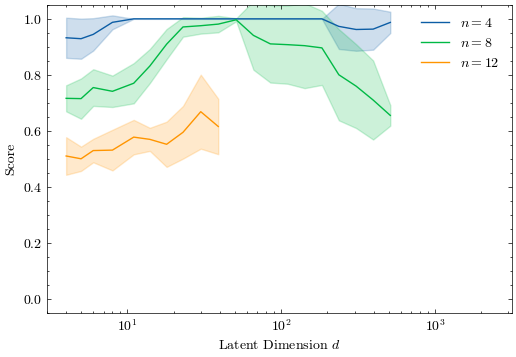

In [15]:
plt.figure(figsize=(6, 4))
for ind, i in enumerate(np.unique(n).astype(int)):
    plot_mean_std_shaded(latent[n == i], z[n == i], z_error[n == i], color=f'C{ind}', label=f'$n = {4 * i}$')
    
plt.xlabel('Latent Dimension $d$')
plt.ylabel('Score')
plt.ylim(-0.05, 1.05)
plt.xlim(3, 10**3.5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()
# plt.savefig(f'./{mode}_score_latent.pdf')
plt.show()

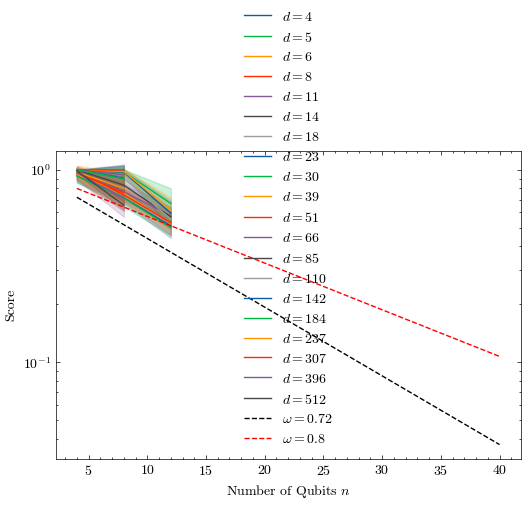

In [16]:
plt.figure(figsize=(6, 4))
for ind, i in enumerate(np.unique(latent).astype(int)):
    if True:
        plot_mean_std_shaded(4 * n[latent == i], z[latent == i], z_error[latent == i], color=f'C{ind}', label=f'$d = {i}$')
    
# plt.plot([4, 40], [15/16, (15/16)**10], 'k--')
plt.plot([4, 40], [0.72, (0.72)**10], 'k--', label=r'$\omega=0.72$')
plt.plot([4, 40], [0.8, (0.8)**10], 'r--', label=r'$\omega=0.8$')
# plt.plot([4, 40], [0.9, (0.9)**10], 'k--')
    
plt.xlabel(r'Number of Qubits $n$')
plt.ylabel('Score')
plt.yscale('log')
plt.legend()
# plt.savefig(f'./{mode}_score_n.pdf')
plt.show()

In [44]:
np.exp(np.log(0.6)/20)

0.9747821379701602